In [1]:
import numpy as np
import pandas as pd
import sklearn 

In [2]:
df = pd.read_csv('breat_cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.columns.shape # - ['id', 'diagnosis', 'Unnamed: 32']
features = df.columns[2:df.shape[1]-2]
features, len(features) 

(Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst',
        'symmetry_worst'],
       dtype='object'),
 29)

In [4]:
df.columns 

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
features 

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')

In [6]:
features_df = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst']]
features_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [7]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
target = df['diagnosis']

In [9]:
features_df.isna().value_counts()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst
False        False         False           False      False            False             False           False                False          False                   False      False       False         False    False          False           False         False              False        False                 False         False          False            False       False             False              False            False                 False             569
Name: count, dtype: int64

Thus, there are no null values in all the feature columns in the dataset.

In [10]:
features_df.dtypes

radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
radius_se                 float64
texture_se                float64
perimeter_se              float64
area_se                   float64
smoothness_se             float64
compactness_se            float64
concavity_se              float64
concave points_se         float64
symmetry_se               float64
fractal_dimension_se      float64
radius_worst              float64
texture_worst             float64
perimeter_worst           float64
area_worst                float64
smoothness_worst          float64
compactness_worst         float64
concavity_worst           float64
concave points_worst      float64
symmetry_worst            float64
dtype: object

All features are of dtype 'object'. Converting them to numeric features.

In [11]:
type(features)

pandas.core.indexes.base.Index

In [12]:
X = features_df.values # np array of feature names
print(X.shape)
# computing mean of all features
mean = np.mean(X, axis=0)
mean


(569, 29)


array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
       9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
       1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
       2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
       3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
       1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
       1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
       2.90075571e-01])

In [13]:
std = np.std(X, axis=0)
std

array([3.52095076e+00, 4.29725464e+00, 2.42776193e+01, 3.51604754e+02,
       1.40517641e-02, 5.27663291e-02, 7.96497253e-02, 3.87687325e-02,
       2.73901809e-02, 7.05415588e-03, 2.77068942e-01, 5.51163427e-01,
       2.02007710e+00, 4.54510134e+01, 2.99987837e-03, 1.78924359e-02,
       3.01595231e-02, 6.16486075e-03, 8.25910439e-03, 2.64374475e-03,
       4.82899258e+00, 6.14085432e+00, 3.35730016e+01, 5.68856459e+02,
       2.28123569e-02, 1.57198171e-01, 2.08440875e-01, 6.56745545e-02,
       6.18130785e-02])

In [14]:
# standardization
Z = (X-mean)/std
Z.shape, X.shape, mean.shape, std.shape

((569, 29), (569, 29), (29,), (29,))

In [15]:
print("Mean of standardized data (should be close to 0):", np.mean(Z, axis=0))
print("Std of standardized data (should be close to 1):", np.std(Z, axis=0))

Mean of standardized data (should be close to 0): [-1.37363271e-16  6.86816353e-17 -1.24875700e-16 -2.18532476e-16
 -8.36667193e-16  1.87313551e-16  4.99502802e-17 -4.99502802e-17
  1.74825981e-16  4.74527662e-16  2.37263831e-16 -1.12388130e-16
 -1.12388130e-16 -1.31119486e-16 -1.52972733e-16  1.74825981e-16
  1.62338411e-16  0.00000000e+00  8.74129903e-17 -6.24378502e-18
 -8.24179623e-16  1.24875700e-17 -3.74627101e-16  0.00000000e+00
 -2.37263831e-16 -3.37164391e-16  7.49254203e-17  2.24776261e-16
  2.62238971e-16]
Std of standardized data (should be close to 1): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


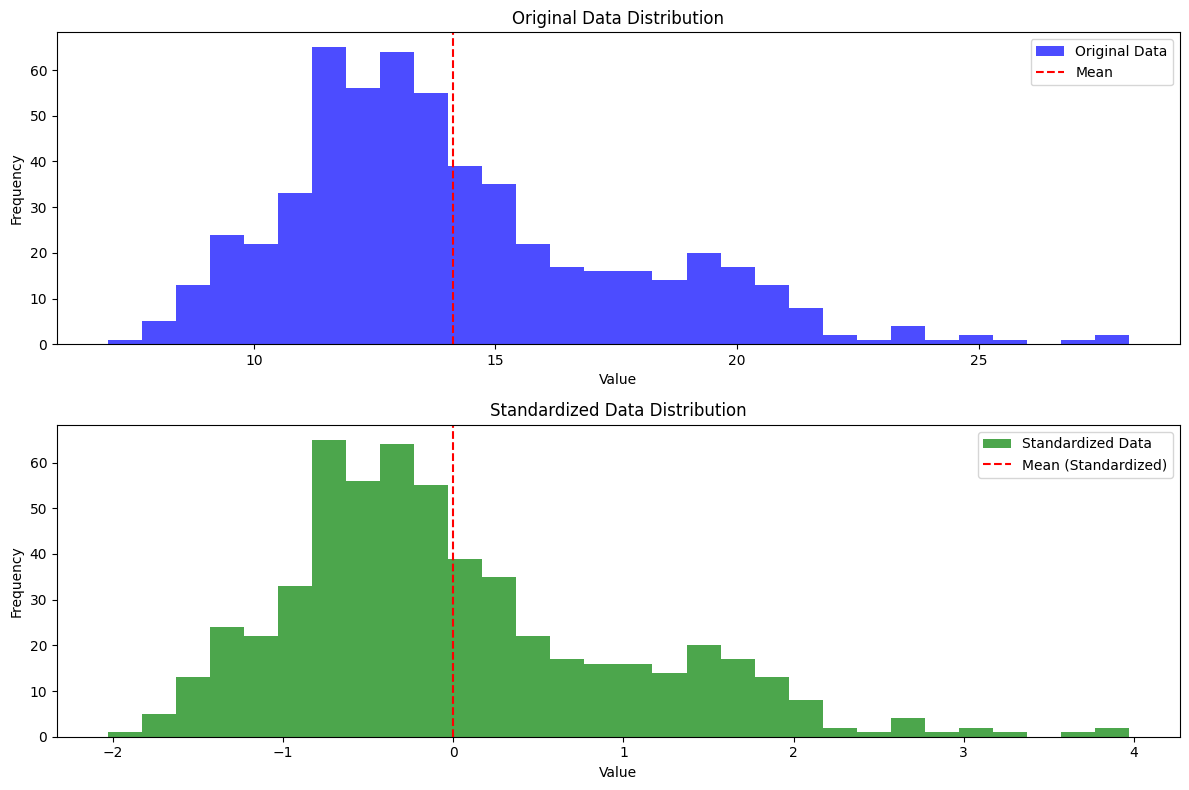

Mean of original feature: 14.127291739894552
Std of original feature: 3.520950760711062
Mean of standardized feature: -1.3736327053358703e-16
Std of standardized feature: 1.0


In [16]:
import matplotlib.pyplot as plt

# Plot original data (X) vs. standardized data (Z)
plt.figure(figsize=(12, 8))

# Choose one feature (e.g., first column) for demonstration
feature_index = 0

# Original data for the chosen feature
plt.subplot(2, 1, 1)
plt.hist(X[:, feature_index], bins=30, alpha=0.7, color='blue', label='Original Data')
plt.axvline(mean[feature_index], color='red', linestyle='--', label='Mean')
plt.title("Original Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

# Standardized data for the same feature
plt.subplot(2, 1, 2)
plt.hist(Z[:, feature_index], bins=30, alpha=0.7, color='green', label='Standardized Data')
plt.axvline(np.mean(Z, axis=0)[feature_index], color='red', linestyle='--', label='Mean (Standardized)')
plt.title("Standardized Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

# Print mean and standard deviation
print("Mean of original feature:", mean[feature_index])
print("Std of original feature:", std[feature_index])
print("Mean of standardized feature:", np.mean(Z[:, feature_index]))
print("Std of standardized feature:", np.std(Z[:, feature_index]))


In [17]:
num_samples, num_features = Z.shape 
print(num_features, num_samples)

29 569


In [18]:
cov_matrix = np.zeros((num_features, num_features))

# pairwise covariances
for i in range(num_features):
    for j in range(num_features):
        cov_matrix[i, j] = np.mean((Z[:, i]-np.mean(Z[:, i]))*(Z[:, j]-np.mean(Z[:, j])))

print(cov_matrix.shape)

(29, 29)


In [19]:
cov_matrix2 = np.cov(Z.T)
cov_matrix2.shape

(29, 29)

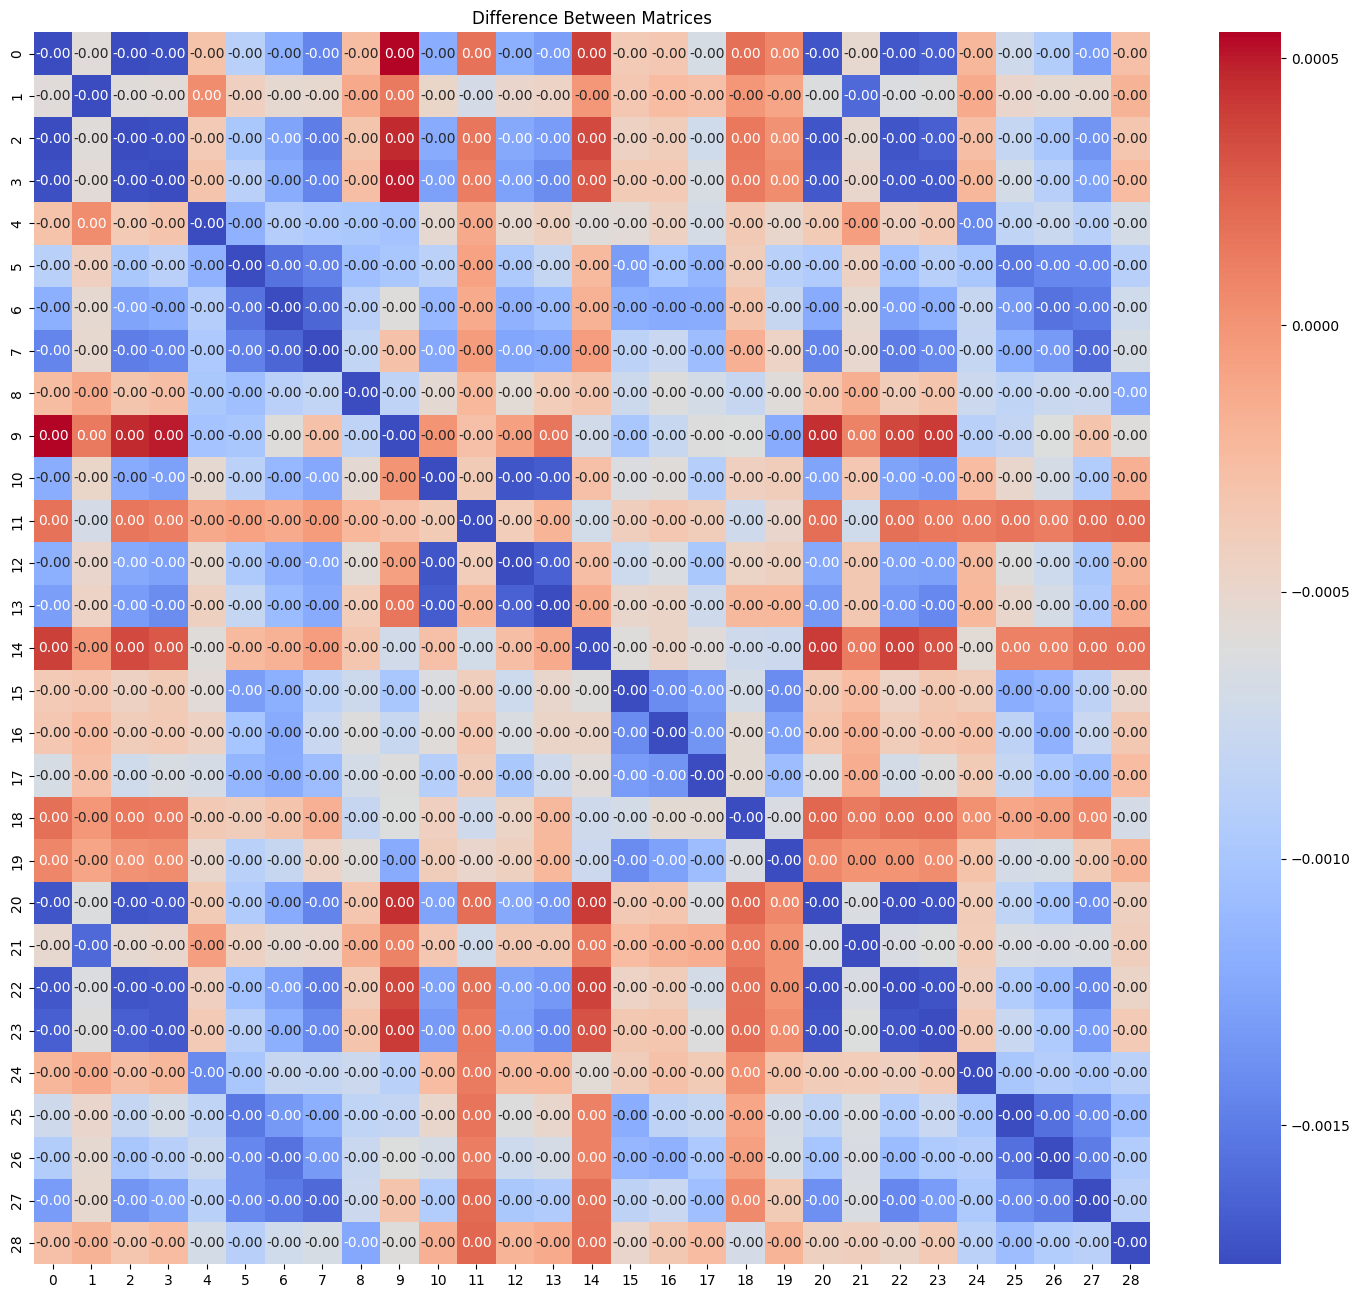

In [24]:
# Difference
difference = cov_matrix - cov_matrix2

# Heatmap of the difference
plt.figure(figsize=(18, 16))
sns.heatmap(difference, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Difference Between Matrices")
plt.show()

Hence, the covariance matrix computed from scratch and from numpy library match since the difference between them is almost 0 for all rows and columns. 

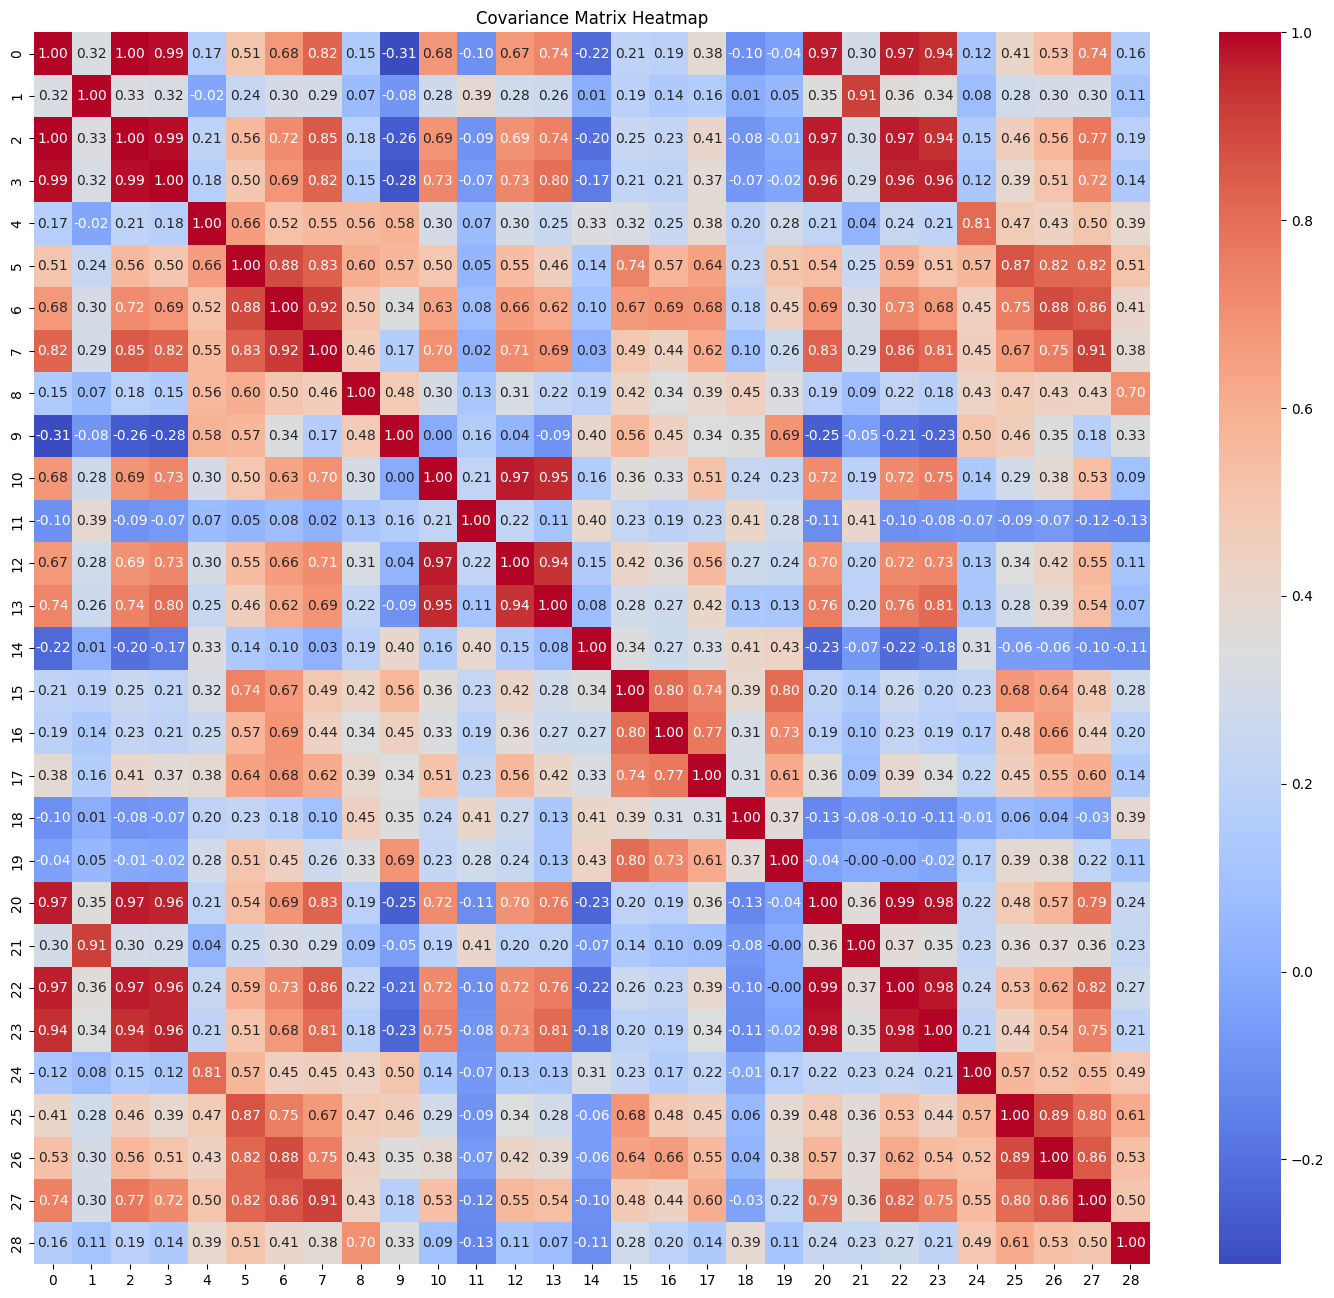

In [22]:
# Heatmap
import seaborn as sns 

plt.figure(figsize=(18, 16))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Covariance Matrix Heatmap")
plt.show()

In [27]:
np.linalg.norm(cov_matrix)

14.660056999948665